(module3-packages1/03-3-xarray)=
# 3. Xarray

# 1. Xarray
## 1.1: Introduction
Xarray builds off of Pandas and is designed to handle higher dimensional data and extends NumPy capabilities by allowing labels to dimensions. It has extensive integration into other packages and is extensivley used when dealing with complex IOT datasets, or those involving climate science. There are two major classes (data structures) in Xarray, **DataArray** and **Dataset**.

- **DataArray** - Multi-dimensional data container, like a labeled Numpy Array
- **Dataset** - A collection of DataArray objects, similar to Pandas DataFrame, but for multi-dimensional data.

**Why Should Chemistry & IoT Data Use Xarray?**
| Feature | Benefit for Chemistry & IoT Data |
|------------|-------------------------------------|
| Labeled Dimensions | Easily track wavelength, time, temperature, sensor IDs. |
| Multi-Dimensional | Store spectra, reaction kinetics, air quality sensor data in one dataset. |
| Lazy Loading | Handle large environmental datasets efficiently. |
| Dask Integration | Scale to **big data (IoT sensor streams, satellite data). |



## 1.2: Xarray & Other Libraries
Xarray is widely used in
- Climate Science
- Remote Sensing
- Oceanography and Meteorology
- Multidimensional Sensor Data (IoT, Machine Learning)

Xarray extends Pandas and NumPy, but is also a dependency many other libraries depend on.

| Library | Xarray’s Relationship |
|------------|---------------------------|
| Pandas | Xarray extends Pandas to higher dimensions (3D+ data). |
| NumPy | Xarray uses NumPy arrays under the hood. |
| NetCDF | Xarray natively reads/writes NetCDF files (widely used in climate science). |
| Dask | Xarray supports parallel computing with Dask for large datasets. |
| Bottleneck | Xarray automatically optimizes performance using Bottleneck for fast reductions (mean, sum, min..) and handling NaNs. |
| SciPy | Xarray integrates with SciPy for interpolation and optimization.

## Install xarray
Open up your terminal and **activate your virtual environment**, and then install xarray using miniconda.
```
conda install -c conda-forge xarray
```
**xarray is typically importated as xr**
```python
import xray as xr
```


# 2. Xarray I/O Functions
## 2.1 Files Pandas can read
Xarray **does not duplicate Pandas I/O functions** for formats that **DataFrames** can already handle efficiently (e.g., CSV, Excel, JSON). For files of these formats the typical workflow is"
1. Use Pandas to read general-purpose data formats (CSV, Excel, JSON).
2. Convert the Pandas DataFrame into an Xarray object (`Dataset` or `DataArray`).

 Xarray provides specialized I/O functions for multidimensional data (NetCDF, Zarr, GeoTIFF).  

## 2.2 Multidimensional files
The following table provides read and write functions within xarray. Note the latter two convert xarray to other pythonic structures.

 | Function | Reads/Writes | File Format | Description |
|-------------|----------------|----------------|----------------|
| `xr.open_dataset()` | Read | NetCDF | Open a NetCDF file as an `xarray.Dataset`. |
| `xr.open_dataarray()` | Read | NetCDF | Open a single NetCDF variable as an `xarray.DataArray`. |
| `xr.load_dataset()` | Read | NetCDF | Load NetCDF into memory instead of lazy loading. |
| `xr.load_dataarray()` | Read | NetCDF | Load a single NetCDF variable into memory. |
| `xr.open_zarr()` | Read | Zarr | Open a Zarr file as an Xarray Dataset. |
| `xr.load_zarr()` | Read | Zarr | Load a Zarr file into memory. |
| `xr.open_rasterio()` | Read | GeoTIFF | Open a GeoTIFF file for spatial analysis. |
| `xr.open_mfdataset()` | Read | NetCDF | Open multiple NetCDF files as a single dataset (lazy loading). |
| `Dataset.to_netcdf()` | Write | NetCDF | Save an Xarray `Dataset` to a NetCDF file. |
| `DataArray.to_netcdf()` | Write | NetCDF | Save an Xarray `DataArray` to a NetCDF file. |
| `Dataset.to_zarr()` | Write | Zarr | Save an Xarray `Dataset` to a Zarr file (good for cloud storage). |
| `Dataset.to_csv()` | Write | CSV | Save a dataset as a CSV file (lossy conversion). |
| `Dataset.to_dataframe()` | Convert | Pandas DataFrame | Convert an `xarray.Dataset` to a Pandas DataFrame. |
| `Dataset.to_dict()` | Convert | Dictionary | Convert an `xarray.Dataset` to a Python dictionary. |

# 3. Xarray Functions

##  Xarray Functions
| Function | Description |
|-------------|----------------|
| `xr.open_dataset()` | Open a NetCDF file as an Xarray `Dataset`. |
| `xr.open_dataarray()` | Open a single NetCDF variable as an `DataArray`. |
| `xr.Dataset()` | Create a new multi-dimensional dataset. |
| `xr.DataArray()` | Create a single variable with labeled axes. |
| `xr.concat()` | Concatenate Xarray objects along a new dimension. |
| `xr.merge()` | Merge multiple datasets into one. |
| `xr.combine_by_coords()` | Combine datasets by aligning their coordinates. |
| `xr.align()` | Align two Xarray objects to a common set of coordinates. |
| `xr.apply_ufunc()` | Apply a function to Xarray objects, supporting parallelization. |
| `xr.where()` | Perform conditional selection like NumPy's `np.where()`. |
| `xr.broadcast()` | Expand dimensions to make two datasets compatible for operations. |
| `xr.corr()` | Compute the correlation coefficient along a specified dimension. |
| `xr.load_dataset()` | Load a dataset into memory (useful for NetCDF files). |
| `xr.save_mfdataset()` | Save multiple datasets into separate NetCDF files. |


# 4. DataArray

## 4.1 Attributes
| Attribute      | Description |
|--------------------|----------------|
| `da.values`       | Returns the raw NumPy array backing the `DataArray`. |
| `da.dims`         | Tuple of dimension names (e.g., `('wavelength', 'time')`). |
| `da.shape`        | Shape of the `DataArray` as a tuple (like NumPy arrays). |
| `da.ndim`         | Number of dimensions in the `DataArray`. |
| `da.size`         | Total number of elements in the `DataArray`. |
| `da.coords`       | Dictionary of coordinate labels (e.g., `"wavelength": [350, 400, 450]`). |
| `da.attrs`        | Dictionary of metadata attributes (e.g., `"units": "absorbance"`). |
| `da.name`         | Name of the `DataArray` (can be `None`). |
| `da.dtype`        | Data type of the `DataArray` elements (e.g., `float64`). |
| `da.nbytes`       | Total memory usage in bytes. |
| `da.sizes`        | Dictionary mapping dimension names to sizes. |
| `da.indexes`      | Dictionary of Pandas `Index` objects for each coordinate. |
| `da.chunks`       | If using Dask, shows chunk sizes for parallel computation. |


## 4.2 Methods

| Method | Description |
|-----------|----------------|
| `.values` | Extract the underlying NumPy array. |
| `.dims` | Get the names of dimensions. |
| `.coords` | Get coordinate labels. |
| `.transpose()` | Transpose dimensions. |
| `.expand_dims()` | Add a new dimension. |
| `.squeeze()` | Remove singleton dimensions. |
| `.plot()` | Generate quick visualizations. |
| `.rolling()` | Apply rolling-window operations. |

# 5. Dataset

## 5.1 Attributes

| Attribute      | Description |
|--------------------|----------------|
| `ds.data_vars`    | Dictionary of variables (`DataArray` objects) stored in the `Dataset`. |
| `ds.dims`         | Dictionary of dimension names and their sizes. |
| `ds.coords`       | Dictionary of coordinate labels for each dimension. |
| `ds.attrs`        | Dictionary of metadata attributes (e.g., `"source": "spectroscopy experiment"`). |
| `ds.sizes`        | Dictionary of dimension names mapped to their sizes. |
| `ds.indexes`      | Dictionary of Pandas `Index` objects for each coordinate. |
| `ds.variables`    | Dictionary of all variables (both data and coordinates). |
| `ds.chunks`       | If using Dask, shows chunk sizes for parallel computation. |
| `ds.nbytes`       | Total memory usage in bytes. |
| `ds.dtype`        | Data type of the stored variables. |
| `ds.shape`        | Shape of the dataset as a tuple (not commonly used). |
| `ds.encoding`     | Dictionary of encoding options (useful for NetCDF/Zarr storage). |


## 5.2 Methods

| Method | Description |
|-----------|----------------|
| `.isel()` | Select data by index (position-based). |
| `.sel()` | Select data by coordinate label. |
| `.drop_vars()` | Drop variables from a dataset. |
| `.rename()` | Rename variables or dimensions. |
| `.mean(dim=…)` | Compute the mean along a given dimension. |
| `.sum(dim=…)` | Compute the sum along a given dimension. |
| `.groupby()` | Group data by a coordinate value. |
| `.resample()` | Resample time-series data. |
| `.rolling()` | Apply rolling window operations. |
| `.differentiate()` | Compute the numerical derivative. |
| `.integrate()` | Compute the numerical integral. |

# 6. Xarray Activity
In this activity we will generate a simulated kinetics plot of the spectra of a hypothetical molecule that follows a Boltzmann distrution and save it as a csv file.  Then we will load the csv file into an xarray DataArray and explore it.

## 6.1 Create spectra simulation

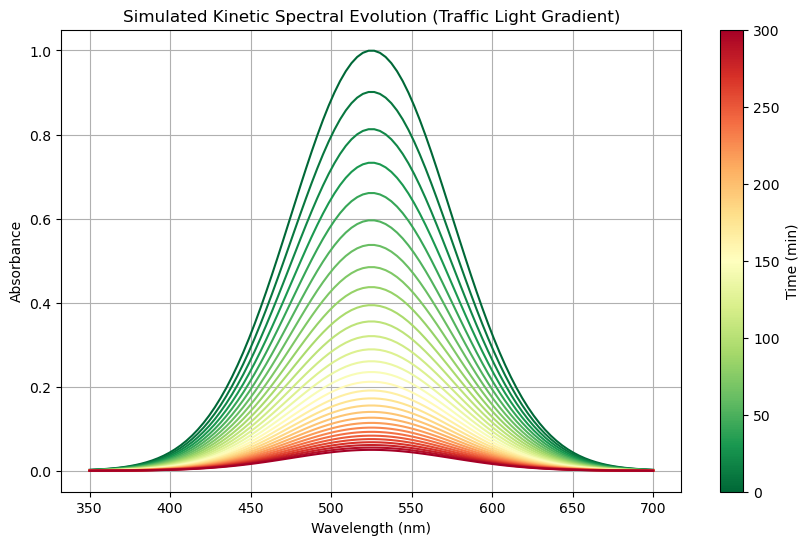

In [1]:
import os
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

# Define base directory and file path
base_data_dir = os.path.expanduser("~/data")  
spectra_dir = os.path.join(base_data_dir, "spectra")  
os.makedirs(spectra_dir, exist_ok=True)  # Ensure directory exists

# Define the file path for saving
spec2_vis_csv_spectrapath = os.path.join(spectra_dir, "spec2_vis.csv")

# Define wavelength and time ranges
wavelengths = np.linspace(350, 700, 100)  # 100 wavelength points
times = np.linspace(0, 300, 30)  # 30 time points

# Simulate Absorbance Spectrum with a Boltzmann-like Shape Across Wavelengths
def generate_spectrum(wavelengths, peak_wavelength=525, width=50, max_absorbance=1.0):
    """Create a Gaussian peak across the wavelength range."""
    return max_absorbance * np.exp(-((wavelengths - peak_wavelength) ** 2) / (2 * width ** 2))

base_spectrum = generate_spectrum(wavelengths)

# Use exponential decay for time behavior
def kinetic_decay(time, t_half=100):
    """Exponential decay function"""
    return np.exp(-time / t_half)  # Corrected to true exponential decay
# Create a 2D Absorbance Array for (Wavelength, Time)
absorbance = np.outer(base_spectrum, kinetic_decay(times))

# Convert to Xarray Dataset
ds = xr.Dataset(
    data_vars={"absorbance": (["wavelength", "time"], absorbance)},
    coords={"wavelength": wavelengths, "time": times}
)

# **Use the correct colormap: "Red-Yellow-Green" (Reversed)**
cmap = plt.get_cmap("RdYlGn_r")  # Green → Yellow → Red
norm = plt.Normalize(vmin=times.min(), vmax=times.max())

# **Create figure**
fig, ax = plt.subplots(figsize=(10, 6))

# **Plot the evolving spectra using traffic light colors**
for i, time in enumerate(times):
    ax.plot(
        wavelengths, 
        ds.absorbance.sel(time=time), 
        color=cmap(norm(time)),  
        label=f"{int(time)} min" if int(time) % 100 == 0 else None
    )

# **Labels and title**
ax.set_xlabel("Wavelength (nm)")
ax.set_ylabel("Absorbance")
ax.set_title("Simulated Kinetic Spectral Evolution (Traffic Light Gradient)")
ax.grid(True)

# **Add a colorbar to show the time evolution properly**
sm = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, label="Time (min)")

# **Show the plot**
plt.show()


## 6.2 Load CSV into Xarray
The first step is to load the CSV into a Dataset. This can be a challenge and will often require you to look at the csv file to see how it is structured
![image.png](images/ed2b15ed-4dab-4763-984a-7a9daaef35cd.png)

Here you can see that the first row (index 0) is labels of the variable type string.  The following code will read the csv into a pandas dataframe, manipulate it so we can convert it to a dataframe and then create the dataframe.

** Line-by-line explanation of code**
1. Importing Required Libraries
```python
import pandas as pd
import xarray as xr
import os
```
- `pandas` (`pd`): Used for reading and manipulating the CSV file as a DataFrame.
- `xarray` (`xr`): Used to create and structure the data into a labeled `xarray.Dataset`.
- `os`: Used to construct file paths dynamically and ensure necessary directories exist.

---

2. Defining the File Path
```python
# Define base directory and file path
base_data_dir = os.path.expanduser("~/data")  
spectra_dir = os.path.join(base_data_dir, "spectra")  
os.makedirs(spectra_dir, exist_ok=True)  # Ensure directory exists

# Define the file path 
spec2_vis_csv_spectrapath = os.path.join(spectra_dir, "spec2_vis.csv")
```
- `os.path.expanduser("~/data")`: Expands `~` (home directory) to its full path.
- `os.path.join(base_data_dir, "spectra")`: Constructs the full path to the `spectra` folder.
- `os.makedirs(spectra_dir, exist_ok=True)`: Creates the directory if it doesn't exist.
- `spec2_vis_csv_spectrapath`: Stores the full path of the CSV file.

3. Loading the CSV File into Pandas*
```python
# Define file path
file_path = spec2_vis_csv_spectrapath  # Replace with your actual file path

# Load CSV with the first row as the header
df_clean = pd.read_csv(file_path, header=0)
```
- Reads the CSV file, assuming the first row (`header=0`) contains column names.
- Stores it in a Pandas DataFrame (`df_clean`).

4. Debugging - Inspecting the Data
```python
# Display the first few rows and column names for debugging
print(df_clean.head())
print(df_clean.columns)
```
- Helps confirm whether the data is read correctly.
-  Sometimes, the first row is mistakenly treated as data instead of headers.

5. Renaming Columns for Consistency
```python
# Rename columns to avoid confusion
df_clean.columns = ['Wavelength', 'Time', 'Absorbance']
```
- Explicitly renames the columns to prevent confusion.
- Ensures consistent naming and avoids issues with column access.

6. Converting Data to Numeric Format
```python
# Convert 'Wavelength' and 'Time' columns to numeric values
df_clean['Wavelength'] = pd.to_numeric(df_clean['Wavelength'], errors='coerce')
df_clean['Time'] = pd.to_numeric(df_clean['Time'], errors='coerce')
```
- Converts `Wavelength` and `Time` columns to numeric types.
- `errors='coerce'`:
  - Converts non-numeric values (e.g., missing or incorrect data) to `NaN`.

7. Removing Invalid Data
```python
# Drop rows with NaN values in 'Wavelength' or 'Time' columns
df_clean.dropna(subset=['Wavelength', 'Time'], inplace=True)
```
- Ensures the dataset contains only valid numeric values.

8. Extracting Unique Time Values
```python
# Extract unique time values
time_values = df_clean['Time'].unique()
```
- Gets unique time values from the `Time` column.
- Needed later for defining `xarray.Dataset` coordinates.

9. Reshaping the Data for Xarray
```python
# Pivot the DataFrame to have 'Wavelength' as index and 'Time' as columns
df_pivot = df_clean.pivot(index='Wavelength', columns='Time', values='Absorbance')
```
- Transforms DataFrame:
  - Rows become wavelengths.
  - Columns become time values.
  - Cells store absorbance data.
- Why? This is necessary to create a structured `xarray.Dataset`.

10. Creating the Xarray Dataset
```python
# Convert the pivoted DataFrame to an xarray Dataset
ds_final = xr.Dataset(
    data_vars={'absorbance': (['wavelength', 'time'], df_pivot.values)},
    coords={'wavelength': df_pivot.index.values, 'time': df_pivot.columns.values}
)
```
- `data_vars`:
  - Defines `'absorbance'` as a 2D array with dimensions (`wavelength`, `time`).
- `coords`:
  - `'wavelength'` and `'time'` are used as coordinate labels.
- This makes it easy to analyze, filter, and visualize the data.

11. Printing the Final Dataset
```python
# Display dataset summary
print(ds_final)
```
- Prints the final `xarray.Dataset`, confirming it has the expected dimensions.

In [2]:
import pandas as pd
import xarray as xr
import os
# Define base directory and file path
base_data_dir = os.path.expanduser("~/data")  
spectra_dir = os.path.join(base_data_dir, "spectra")  
os.makedirs(spectra_dir, exist_ok=True)  # Ensure directory exists

# Define the file path 
spec2_vis_csv_spectrapath = os.path.join(spectra_dir, "spec2_vis.csv")

# Define file path
file_path = spec2_vis_csv_spectrapath  # Replace with your actual file path

# Load CSV with the first row as the header
df_clean = pd.read_csv(file_path, header=0)

# Display the first few rows and column names for debugging
print(df_clean.head())
print(df_clean.columns)

# Rename columns to avoid confusion
df_clean.columns = ['Wavelength', 'Time', 'Absorbance']

# Convert 'Wavelength' and 'Time' columns to numeric values
df_clean['Wavelength'] = pd.to_numeric(df_clean['Wavelength'], errors='coerce')
df_clean['Time'] = pd.to_numeric(df_clean['Time'], errors='coerce')

# Drop rows with NaN values in 'Wavelength' or 'Time' columns
df_clean.dropna(subset=['Wavelength', 'Time'], inplace=True)


# Extract unique time values
time_values = df_clean['Time'].unique()

# Pivot the DataFrame to have 'Wavelength' as index and 'Time' as columns
df_pivot = df_clean.pivot(index='Wavelength', columns='Time', values='Absorbance')

# Convert the pivoted DataFrame to an xarray Dataset
ds_final = xr.Dataset(
    data_vars={'absorbance': (['wavelength', 'time'], df_pivot.values)},
    coords={'wavelength': df_pivot.index.values, 'time': df_pivot.columns.values}
)

# Display dataset summary
print(ds_final)


   wavelength       time  absorbance
0       350.0   0.000000    0.002187
1       350.0  10.344828    0.001973
2       350.0  20.689655    0.001779
3       350.0  31.034483    0.001604
4       350.0  41.379310    0.001446
Index(['wavelength', 'time', 'absorbance'], dtype='object')
<xarray.Dataset> Size: 25kB
Dimensions:     (wavelength: 100, time: 30)
Coordinates:
  * wavelength  (wavelength) float64 800B 350.0 353.5 357.1 ... 696.5 700.0
  * time        (time) float64 240B 0.0 10.34 20.69 31.03 ... 279.3 289.7 300.0
Data variables:
    absorbance  (wavelength, time) float64 24kB 0.002187 0.001973 ... 0.0001089


## 6.3 Save Xarray Dataset as NetCDF file

In [3]:
base_data_dir = os.path.expanduser("~/data")  
spectra_dir = os.path.join(base_data_dir, "spectra")  
os.makedirs(spectra_dir, exist_ok=True)  # Ensure directory exists

# Define the file path 
spec2_nc_spectrapath = os.path.join(spectra_dir, "spec2_vis.nc")
ds_final.to_netcdf(spec2_nc_spectrapath)

# Confirm that the file has been saved
if os.path.isfile(spec2_nc_spectrapath):
    print(f"Dataset successfully saved to: {spec2_nc_spectrapath}")
else:
    print("Failed to save the dataset.")

Dataset successfully saved to: /home/rebelford/data/spectra/spec2_vis.nc


## 6.4 Loading NetCDF file to Dataset


In [4]:
import xarray as xr

# Define the path to your NetCDF file
file_path = spec2_nc_spectrapath  # Ensure this variable contains the correct path to 'cpec2_vis.nc'

# Open the NetCDF file and assign it to a new Dataset
new_ds = xr.open_dataset(file_path)

# Display the contents of the new Dataset
print(new_ds)


<xarray.Dataset> Size: 25kB
Dimensions:     (wavelength: 100, time: 30)
Coordinates:
  * wavelength  (wavelength) float64 800B 350.0 353.5 357.1 ... 696.5 700.0
  * time        (time) float64 240B 0.0 10.34 20.69 31.03 ... 279.3 289.7 300.0
Data variables:
    absorbance  (wavelength, time) float64 24kB ...


## 6.5 Exploring the Data
We will first look at the range of our variables.
### Find Range of Variables

In [5]:
# Range of absorbance
absorbance_min = new_ds['absorbance'].min().item()
absorbance_max = new_ds['absorbance'].max().item()

# Range of wavelength
wavelength_min = new_ds['wavelength'].min().item()
wavelength_max = new_ds['wavelength'].max().item()

# Range of time
time_min = new_ds['time'].min().item()
time_max = new_ds['time'].max().item()

print(f"Absorbance: min = {absorbance_min}, max = {absorbance_max}")
print(f"Wavelength: min = {wavelength_min}, max = {wavelength_max}")
print(f"Time: min = {time_min}, max = {time_max}")


Absorbance: min = 0.000108908769855, max = 0.9993752590009782
Wavelength: min = 350.0, max = 700.0
Time: min = 0.0, max = 300.0


### Plot Spectra at given time


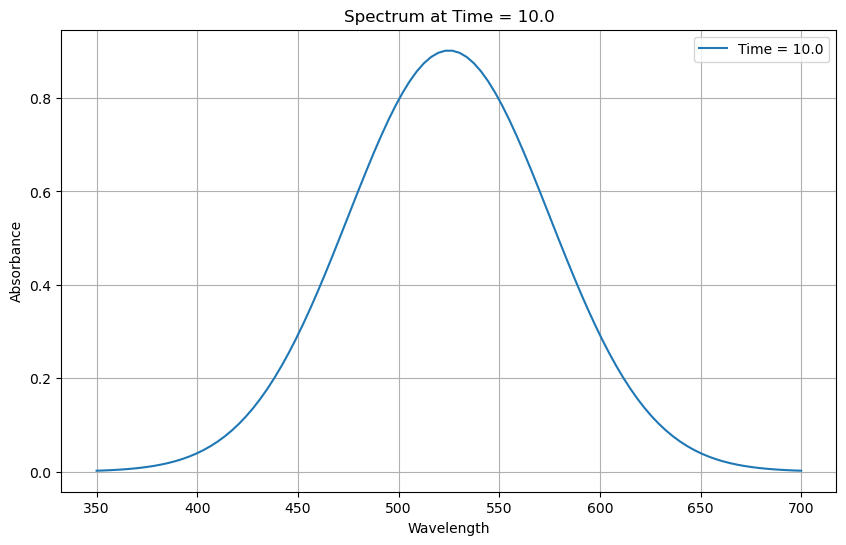

In [6]:
import matplotlib.pyplot as plt

# Specify the time for which to plot the spectrum
time_point = 10.0  # Replace with your desired time value

# Select the data at the specified time
spectrum = new_ds.sel(time=time_point, method='nearest')

# Plot the spectrum
plt.figure(figsize=(10, 6))
plt.plot(spectrum['wavelength'], spectrum['absorbance'], label=f'Time = {time_point}')
plt.xlabel('Wavelength')
plt.ylabel('Absorbance')
plt.title(f'Spectrum at Time = {time_point}')
plt.legend()
plt.grid(True)
plt.show()


### Plot Kinetic decay at wavelength

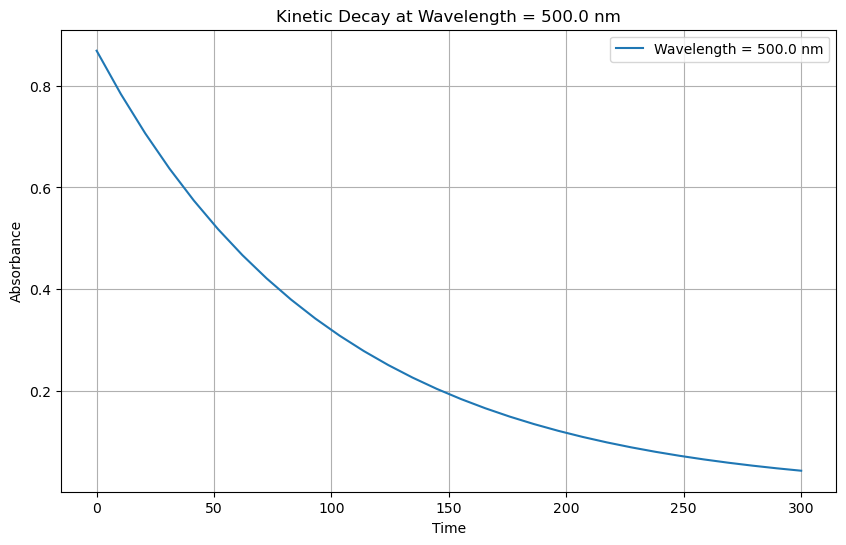

In [7]:
# Specify the wavelength for which to plot the kinetic decay
wavelength_point = 500.0  # Replace with your desired wavelength value

# Select the data at the specified wavelength
kinetic_decay = new_ds.sel(wavelength=wavelength_point, method='nearest')

# Plot the kinetic decay
plt.figure(figsize=(10, 6))
plt.plot(kinetic_decay['time'], kinetic_decay['absorbance'], label=f'Wavelength = {wavelength_point} nm')
plt.xlabel('Time')
plt.ylabel('Absorbance')
plt.title(f'Kinetic Decay at Wavelength = {wavelength_point} nm')
plt.legend()
plt.grid(True)
plt.show()


# Acknowledgements
This content was developed with assistance from [Perplexity AI](https://www.perplexity.ai/) and [Chat GPT](https://chatgpt.com/). Multiple queries were made during the Fall 2024 and the Spring 2025.